In [11]:
import pandas as pd
import sklearn

In [12]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df =pd.DataFrame(X,columns=iris.feature_names)
dfclass=pd.DataFrame(iris.target,columns=['class'])
df=pd.concat([df,dfclass],axis=1)

In [14]:
kclu=KMeans(n_clusters=3)

In [15]:
kclu.fit(X)

KMeans(n_clusters=3)

In [16]:
kclu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
dfcluster=pd.DataFrame(kclu.labels_,columns=['cluster'])
dfall=pd.concat([df,dfcluster],axis=1)
dfall.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [18]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
confusion_matrix(dfall['class'], dfall['cluster'])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

### Internal Cluster Validity Metrics

In [19]:
metrics.calinski_harabasz_score(X, dfall['cluster']) 

561.62775662962

In [20]:
metrics.silhouette_score(X, dfall['cluster'], metric='euclidean')

0.5528190123564091

### External Cluster Validity Metrics

In [21]:
metrics.fowlkes_mallows_score(dfall['class'], dfall['cluster'])

0.8208080729114153

In [22]:
metrics.adjusted_rand_score(dfall['class'], dfall['cluster']) 

0.7302382722834697

In [23]:
metrics.mutual_info_score(dfall['class'], dfall['cluster'])  

0.8255910976103356

In [24]:
metrics.homogeneity_score(dfall['class'], dfall['cluster']) 

0.7514854021988338

In [25]:
metrics.completeness_score(dfall['class'], dfall['cluster']) 

0.7649861514489815

In [26]:
metrics.v_measure_score(dfall['class'], dfall['cluster'])    

0.7581756800057784

In [27]:
### Plot clusters in 2D

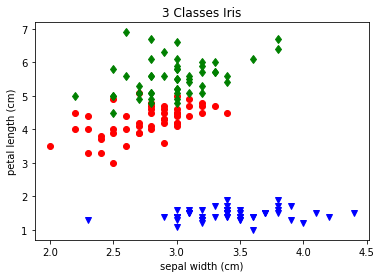

In [28]:
import matplotlib.pyplot as plt

df0=dfall[dfall['class']==0]
df1=dfall[dfall['class']==1]
df2=dfall[dfall['class']==2]

plt.plot(df0[iris.feature_names[1]],df0[iris.feature_names[2]],'bv')
plt.plot(df1[iris.feature_names[1]],df1[iris.feature_names[2]],'ro')
plt.plot(df2[iris.feature_names[1]],df2[iris.feature_names[2]],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Classes Iris')
plt.show()

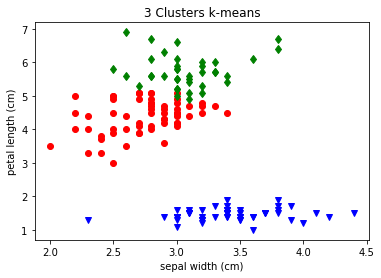

In [29]:
import matplotlib.pyplot as plt

df0=dfall[dfall['cluster']==0]
df1=dfall[dfall['cluster']==1]
df2=dfall[dfall['cluster']==2]

plt.plot(df0[iris.feature_names[1]],df0[iris.feature_names[2]],'bv')
plt.plot(df1[iris.feature_names[1]],df1[iris.feature_names[2]],'ro')
plt.plot(df2[iris.feature_names[1]],df2[iris.feature_names[2]],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Clusters k-means')
plt.show()

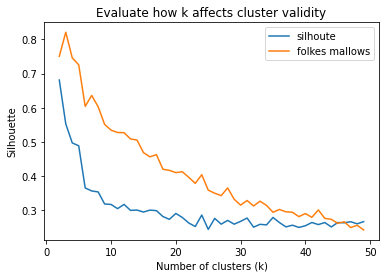

In [30]:
xs=range(2,50)
sils=[]
fms=[]

for i in xs:
    kclu=KMeans(n_clusters=i)
    kclu.fit(X)
    sils.append(metrics.silhouette_score(X, kclu.labels_, metric='euclidean'))
    fms.append(metrics.fowlkes_mallows_score(dfall['class'], kclu.labels_))
plt.plot(xs,sils)
plt.plot(xs,fms)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette')
plt.title('Evaluate how k affects cluster validity')
plt.legend(['silhoute','folkes mallows'])
plt.show()